## Tratamento dos dados

In [56]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import pandas as pd
import seaborn as sns

In [42]:
df = pd.read_csv("tips.csv")

In [43]:
df

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [44]:
#Troca dos nomes da colunas
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [45]:
df_gorjetas = df.rename(columns = renomear)

In [46]:
df_gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [47]:
df_gorjetas.sobremesa.unique() # opções da coluna sobremesa

array(['No', 'Yes'], dtype=object)

In [48]:
#Trocando para portugues
df_gorjetas.sobremesa = df_gorjetas.sobremesa.apply(lambda x: "Não" if x == "No" else "Sim")

In [54]:
df_gorjetas.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [50]:
#Verificar as opções da coluna hora do dia
df_gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [51]:
df_gorjetas.hora_do_dia = df_gorjetas.hora_do_dia.apply(lambda x: "Jantar" if x == "Dinner" else "Almoço")

In [65]:
df_gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [61]:
#Verificar os dias da semana
df_gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [62]:
dia = {'Sun': "Domingo", 'Sat': "Sábado", 'Thur': "Quinta", 'Fri': "Sexta"}
df_gorjetas.dia_da_semana = df_gorjetas.dia_da_semana.map(dia)

In [63]:
df_gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [66]:
df_gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


---
## Analise 1 - Valor da conta e Gorjeta


In [67]:
#Verificar quais são as colunas
df_gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

In [73]:
registros, colunas = df_gorjetas.shape
print(f"A base de dados contem {registros} registros.")

A base de dados contem 244 registros.


In [74]:
#informações sobre a base de dados se existe dados nulos
df_gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


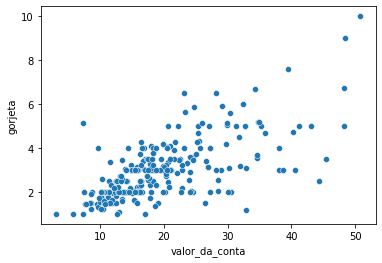

In [75]:
valores_gorjeta = sns.scatterplot(x="valor_da_conta", y="gorjeta", data=df_gorjetas)

---
## Calculando porcentagem do valor da gorjeta em relação ao valor da conta

In [81]:
df_gorjetas["porcentagem"] = ((df_gorjetas.gorjeta / df_gorjetas.valor_da_conta) * 100).round(2)

In [82]:
df_gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,20.39
240,27.18,2.00,Sim,Sábado,Jantar,2,7.36
241,22.67,2.00,Sim,Sábado,Jantar,2,8.82
242,17.82,1.75,Não,Sábado,Jantar,2,9.82


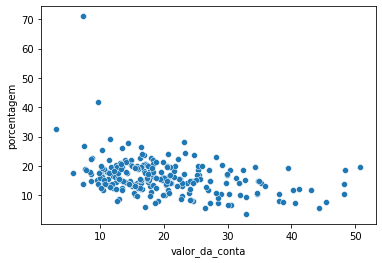

In [88]:
porcentagem_da_conta = sns.scatterplot(x="valor_da_conta", y="porcentagem", data=df_gorjetas)